In [1]:
from glob import glob
import pandas as pd
import re
import numpy as np

In [4]:
ims=glob('/voyager/datasets/coil-100/*.png')

In [9]:
def extract_obj_num(path):
    srch = re.search(r'obj(\d+)__(\d+)', path)
    return int(srch.group(1)), int(srch.group(2))

# create a dataframe with all the relevant paths and labels
nums = [extract_obj_num(x) for x in ims]
df = pd.DataFrame([{'path': p, 'obj': o, 'pose': a} for p, (o, a) in zip(ims, nums)])
df = df.sample(frac=1).sort_values('pose').reset_index(drop=True)

# assign a split col such that pos < 180 is randomly p1 or p2 and pose >= 180 is q1 or q2
df['split'] = 'na'
p = np.arange(len(df) // 2)
p1 = np.random.choice(p, len(df)//4, replace=False)

q = np.arange(len(df) // 2, len(df) )
q1 = np.random.choice(q, len(df)//4, replace=False)
p = np.arange(len(df) // 2)
p1 = np.random.choice(p, len(df)//4, replace=False)

q = np.arange(len(df) // 2, len(df) )
q1 = np.random.choice(q, len(df)//4, replace=False)

In [109]:
# double check that the split sizes are equal
np.unique(df.split, return_counts=True)

(array(['p1', 'p2', 'q1', 'q2'], dtype=object),
 array([1800, 1800, 1800, 1800]))

In [122]:
# write to csv
df.to_csv('/voyager/datasets/coil-100/annotations.csv', index=False)

In [2]:
df = pd.read_csv('/voyager/datasets/coil-100/annotations.csv')

split
p1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
p2    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
q1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
q2    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

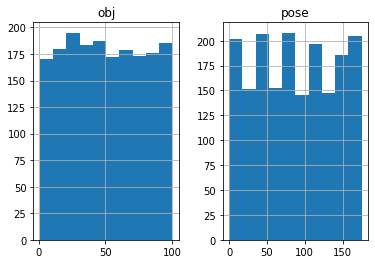

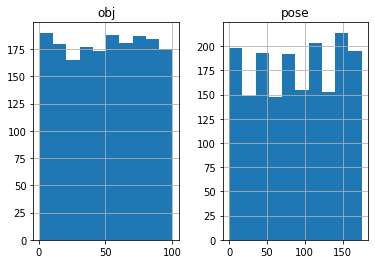

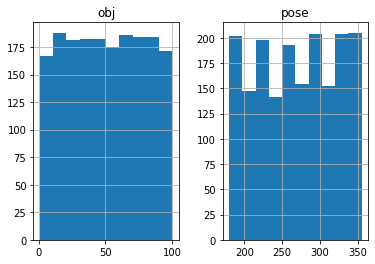

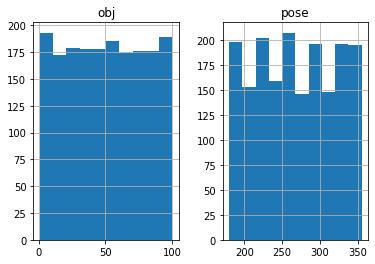

In [8]:
df.groupby('split').hist()

In [ ]:
3